## <center> TP-02: Practical Session: Concepts of Search Engine

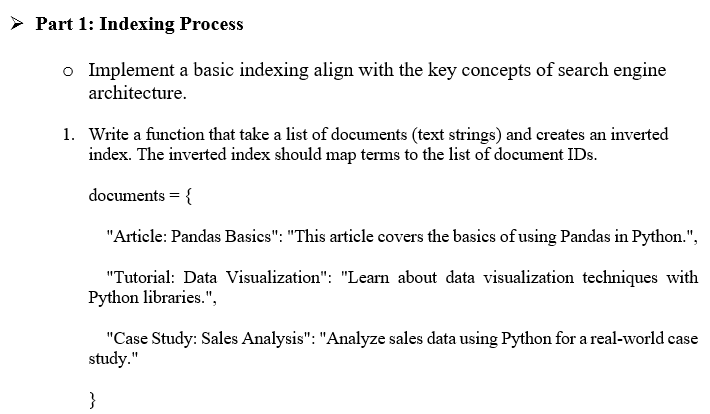

In [33]:
import re
from collections import defaultdict

def create_inverted_index(documents):
    inverted_index = defaultdict(list)

    for doc_id, content in documents.items():
        # Tokenize the content (convert to lowercase and split on non-word characters)
        tokens = re.findall(r'\w+', content.lower())

        # Add each token to the inverted index
        for token in set(tokens):
            inverted_index[token].append(doc_id)

    return dict(inverted_index)

if __name__ == "__main__":
    documents = {
        "Article: Pandas Basics": "This article covers the basics of using Pandas in Python.",
        "Tutorial: Data Visualization": "Learn about data visualization teachniques with Python libraries.",
        "Case Study: Sale Analysis": "Analyze sales data using Python for a real-world case study."
    }

    inverted_index = create_inverted_index(documents=documents)

    for term, doc_ids in inverted_index.items():
        print(f"query = '{term}' is in document : {doc_ids}")



query = 'of' is in document : ['Article: Pandas Basics']
query = 'this' is in document : ['Article: Pandas Basics']
query = 'pandas' is in document : ['Article: Pandas Basics']
query = 'basics' is in document : ['Article: Pandas Basics']
query = 'python' is in document : ['Article: Pandas Basics', 'Tutorial: Data Visualization', 'Case Study: Sale Analysis']
query = 'article' is in document : ['Article: Pandas Basics']
query = 'the' is in document : ['Article: Pandas Basics']
query = 'using' is in document : ['Article: Pandas Basics', 'Case Study: Sale Analysis']
query = 'in' is in document : ['Article: Pandas Basics']
query = 'covers' is in document : ['Article: Pandas Basics']
query = 'about' is in document : ['Tutorial: Data Visualization']
query = 'data' is in document : ['Tutorial: Data Visualization', 'Case Study: Sale Analysis']
query = 'learn' is in document : ['Tutorial: Data Visualization']
query = 'libraries' is in document : ['Tutorial: Data Visualization']
query = 'with' is

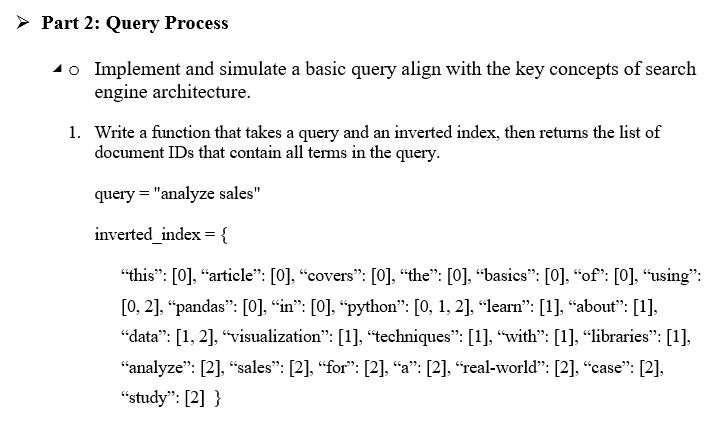

In [34]:
def search_documents(query, inverted_index):
    
    # Tokenize and lowercase the query
    query_terms = query.lower().split()
    
    # Get the set of document IDs for each query term
    doc_sets = [set(inverted_index.get(term, [])) for term in query_terms]
    
    # Find the intersection of all document sets
    if doc_sets:
        result = set.intersection(*doc_sets)
        return list(result)
    else:
        return []

# Example usage
query = "analyze sales"
inverted_index = {
    "this": [0], "article": [0], "covers": [0], "the": [0], "basics": [0], "of": [0], "using": [0, 2],
    "pandas": [0], "in": [0], "python": [0, 1, 2], "learn": [1], "about": [1], "data": [1, 2],
    "visualization": [1], "techniques": [1], "with": [1], "libraries": [1], "analyze": [2], "sales": [2],
    "for": [2], "a": [2], "real-world": [2], "case": [2], "study": [2]
}

# "this": [0] : it means that the word "this" stand by in document id = 0 or the first document.
# Our main purpose is to identifying the indexing of document_id where consisting the query statement via dictionary of inverted index words.

if __name__ == "__main__":

    result = search_documents(query, inverted_index)
    
    print(f"Documents containing query = '{query}' is at the id = {result}")


Documents containing query = 'analyze sales' is at the id = [2]


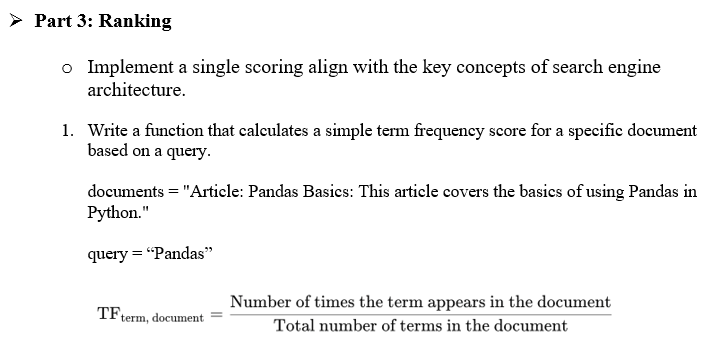

In [35]:
# Implement a simple term frequency scoring function

def calculate_tf_score(document, query):
    """
    Calculate a simple term frequency score for a document based on a query.
    
    Args:
    document (str): The text content of the document.
    query (str): The search query.
    
    Returns:
    float: The term frequency score.
    """
    # Convert document and query to lowercase for case-insensitive matching
    document = document.lower()
    query = query.lower()
    
    # Split the document into words
    doc_words = document.split()
    
    # Count the occurrences of query terms in the document
    query_terms = query.split()
    term_count = sum(doc_words.count(term) for term in query_terms)
    
    # Calculate the score as term frequency
    score = term_count / len(doc_words)
    
    print(f"The number of query terms in document is : {term_count}")
    print(f"The total number of term in documents is : {len(doc_words)}")
    return score

if __name__ == "__main__":

    document = "Article: Pandas Basics: This article covers the basics of using Pandas in Python."
    query = "Pandas"

    tf_score = calculate_tf_score(document, query)
    print(f"Term Frequency Score for '{query}' in the document: {tf_score:.4f}")


The number of query terms in document is : 2
The total number of term in documents is : 13
Term Frequency Score for 'Pandas' in the document: 0.1538


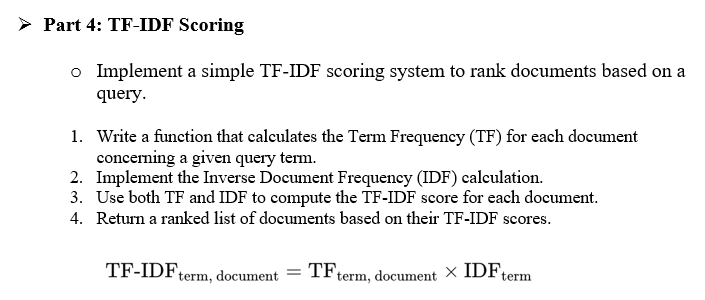

$$
IDF = ln(\frac{\text{total number of term in document}}{1+\text{number of query term}})
$$

$$
TF = \frac{\text{number of query term}}{\text{total number of term in document}}
$$

<center> 

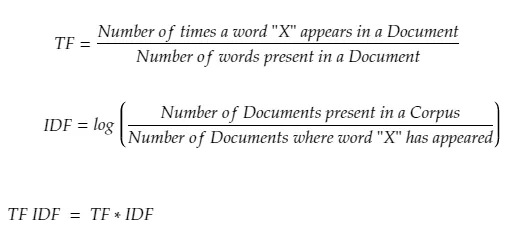

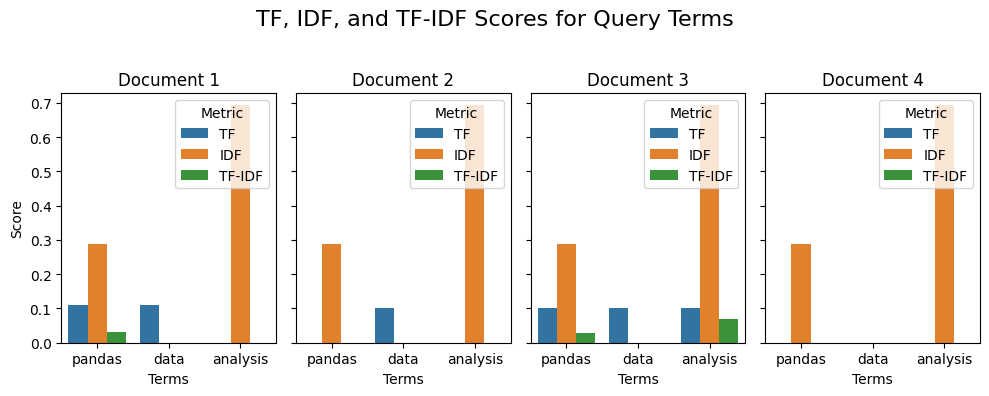

Original Document:
- Pandas is a powerful data manipulation library for Python.
- Python is a versatile programming language used in data science.
- Data analysis often involves using libraries like Pandas and NumPy.
- Machine learning algorithms can be implemented using Python libraries.
Ranked documents based on the query 'Pandas data analysis':
1. Data analysis often involves using libraries like Pandas and NumPy.
2. Pandas is a powerful data manipulation library for Python.
3. Python is a versatile programming language used in data science.
4. Machine learning algorithms can be implemented using Python libraries.


In [72]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calculate_tf(document, term):
    """Calculate Term Frequency for a term in a document."""
    words = document.lower().split()
    return words.count(term.lower()) / len(words)   

def calculate_idf(documents, term):
    """Calculate Inverse Document Frequency for a term across all documents."""
    num_documents = len(documents)
    num_documents_with_term = sum(1 for doc in documents if term.lower() in doc.lower())
    return math.log(num_documents / (1 + num_documents_with_term))

def calculate_tf_idf(documents, query):
    """Calculate TF-IDF scores for documents based on a query and plot their values."""
    scores = []
    query_terms = query.lower().split()
    data_for_plot = []  # Store data for visualization

    for i, doc in enumerate(documents):
        tf_values = []
        idf_values = []
        tf_idf_values = []
        
        for term in query_terms:
            tf = calculate_tf(doc, term)
            idf = calculate_idf(documents, term)
            tf_idf = tf * idf
            
            tf_values.append(tf)
            idf_values.append(idf)
            tf_idf_values.append(tf_idf)
            
            # Collect data for plotting
            data_for_plot.append({
                "Document": f"Document {i+1}",
                "Term": term,
                "TF": tf,
                "IDF": idf,
                "TF-IDF": tf_idf
            })

        # Summing up the TF-IDF for document relevance
        total_score = sum(tf_idf_values)
        scores.append((i, total_score))

    # Create a DataFrame for visualization
    plot_df = pd.DataFrame(data_for_plot)
    plot_tf_idf_grouped_bar(plot_df)
    
    return sorted(scores, key=lambda x: x[1], reverse=True)
# ===================================================================================================================
def plot_tf_idf_grouped_bar(data):
    """Plot TF, IDF, and TF-IDF using grouped bar charts."""
    documents = data["Document"].unique()

    fig, axes = plt.subplots(1, len(documents), figsize=(10, 4), sharey=True)
    fig.suptitle("TF, IDF, and TF-IDF Scores for Query Terms", fontsize=16)

    for i, doc in enumerate(documents):
        doc_data = data[data["Document"] == doc]
        doc_data_melted = doc_data.melt(
            id_vars=["Term"], 
            value_vars=["TF", "IDF", "TF-IDF"], 
            var_name="Metric", 
            value_name="Value"
        )

        sns.barplot(
            x="Term",
            y="Value",
            hue="Metric",
            data=doc_data_melted,
            ax=axes[i]
        )
        axes[i].set_title(doc)
        axes[i].set_xlabel("Terms")
        if i == 0:  # Only label the y-axis for the first document
            axes[i].set_ylabel("Score")
        else:
            axes[i].set_ylabel("")
        axes[i].legend(loc="upper right", title="Metric")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def rank_documents(documents, query):
    """Rank documents based on TF-IDF scores."""
    ranked_docs = calculate_tf_idf(documents, query)
    return [documents[i] for i, _ in ranked_docs]


if __name__ == "__main__":
    documents = [
        "Pandas is a powerful data manipulation library for Python.",
        "Python is a versatile programming language used in data science.",
        "Data analysis often involves using libraries like Pandas and NumPy.",
        "Machine learning algorithms can be implemented using Python libraries." ]

    query = "Pandas data analysis"
    ranked_documents = rank_documents(documents, query)

    print("Original Document:")
    for doc in documents:
        print(f"- {doc}")
    print("==========================================================================")
    print("Ranked documents based on the query '{}':".format(query))
    for i, doc in enumerate(ranked_documents, 1):
        print(f"{i}. {doc}")


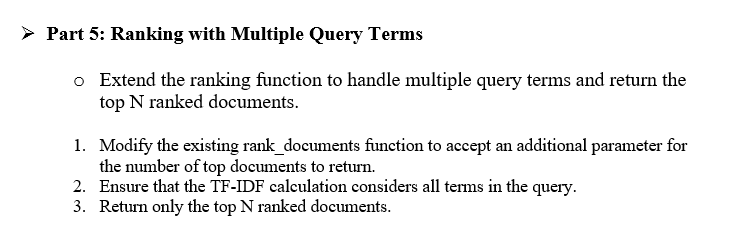

In [37]:
# Modify the rank_documents function to handle multiple query terms and return top N documents

def rank_documents(documents, query, top_n=None):
    """
    Rank documents based on TF-IDF scores for multiple query terms.
    
    Args:
    documents (list): List of document strings.
    query (str): Query string containing one or more terms.
    top_n (int, optional): Number of top ranked documents to return. If None, return all.
    
    Returns:
    list: Top N ranked documents.
    """
    ranked_docs = calculate_tf_idf(documents, query)
    
    # If top_n is not specified or is greater than the number of documents,
    # return all ranked documents
    if top_n is None or top_n > len(documents):
        top_n = len(documents)
    
    # Return only the top N ranked documents
    return [documents[i] for i, _ in ranked_docs[:top_n]]

# Example usage
query = "Python data analysis"
top_n = 2
top_ranked_documents = rank_documents(documents, query, top_n)

print(f"Top {top_n} ranked documents based on the query '{query}':")
for i, doc in enumerate(top_ranked_documents, 1):
    print(f"{i}. {doc}")


Top 2 ranked documents based on the query 'Python data analysis':
1. Data analysis often involves using libraries like Pandas and NumPy.
2. Pandas is a powerful data manipulation library for Python.


#### References 

 - https://adityagoel123.medium.com/concept-of-tf-idf-vectors-65774b908a93
 - 